In [29]:
import cv2
import matplotlib.pyplot as plt

In [30]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

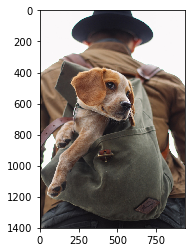

In [31]:
plt.imshow(img1)

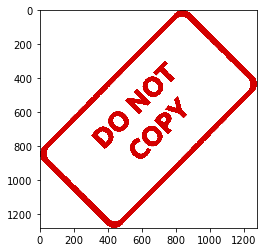

In [32]:
plt.imshow(img2)

In [33]:
# Blending image of the same size
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

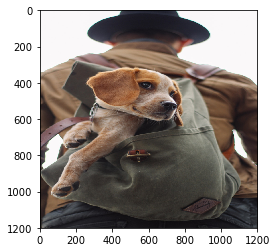

In [34]:
plt.imshow(img1)

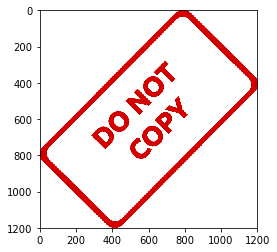

In [35]:
plt.imshow(img2)

In [38]:
# we were able to run this and it overlapped correctly because we had resized the image in the previous steps
# add weighted will work only if the images are of the same size
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=10)

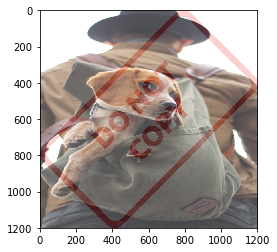

In [39]:
plt.imshow(blended)

In [48]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

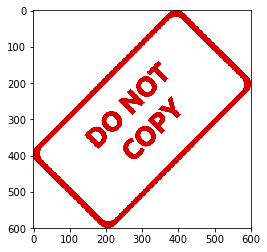

In [49]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

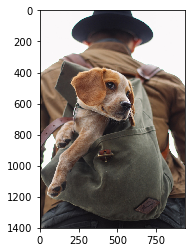

In [50]:
plt.imshow(img1)

In [51]:
# we need to now overlay the small image on the larger image
large_img = img1
small_img = img2

In [52]:
# let us use numpy slicing
x_offset = 100
y_offset = 400

In [57]:
small_img.shape

(600, 600, 3)

In [53]:
# where am i ending x_offset and y_offset
# the end has to be offset plus the end of the small image width and length 
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [54]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

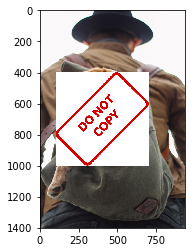

In [55]:
plt.imshow(large_img)

In [58]:
# BLEND THE IMAGE OF DIFFERENT SIZE

In [59]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [60]:
img2 = cv2.resize(img2,(600,600))

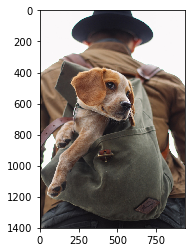

In [61]:
plt.imshow(img1)

In [63]:
# NOW LETS US CREATE A REGION OF INTEREST WHERE WE WANT TO PASTE THE IMG2 ON IMG1
img1.shape

(1401, 934, 3)

# From above you can see tha y-axis is 1401 first item , x-axis is 934 2nd item

In [64]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [65]:
img2.shape

(600, 600, 3)

In [66]:
rows,cols,channels = img2.shape

In [68]:
# region of interest
# basically from y_offset to x_offset we are going all the way till the end of 2nd image size
roi = img1[y_offset : 1401,x_offset:934]

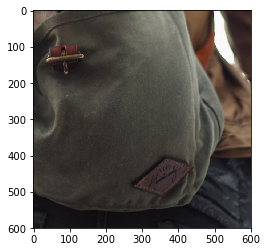

In [69]:
plt.imshow(roi)

# From above we can see that we have sliced the image where we want to paste img2 over

# Now let us create a MASK

In [71]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

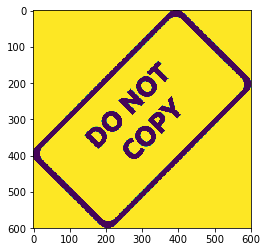

In [72]:
plt.imshow(img2gray)

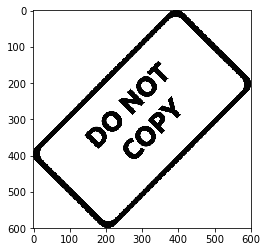

In [73]:
# map the entire image to gray scale
plt.imshow(img2gray,cmap='gray')

# we Need inverse of of the above image where the background becomes black and the content in black becomes white

In [75]:
mask_inv = cv2.bitwise_not(img2gray)

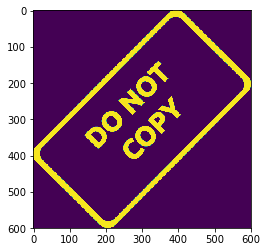

In [76]:
plt.imshow(mask_inv)

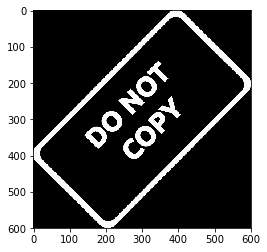

In [77]:
plt.imshow(mask_inv,cmap='gray')

In [78]:
mask_inv.shape

(600, 600)

# After converting the above image to the image to the required mask, we see that the shape is changed to 600* 600 , so that color channel goes missing. Need to add the color channel before we can copy img2 on img1

## It is achieved by using numpy lib

In [82]:
import numpy as np

In [84]:
white_bck = np.full(img2.shape,255,dtype=np.uint8)

In [85]:
white_bck.shape

(600, 600, 3)

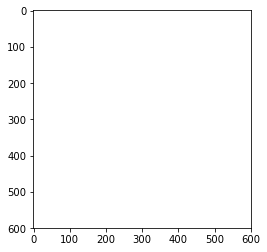

In [96]:
plt.imshow(white_bck)

In [86]:
bckgrnd = cv2.bitwise_or(white_bck,white_bck,mask=mask_inv)

In [87]:
bckgrnd.shape

(600, 600, 3)

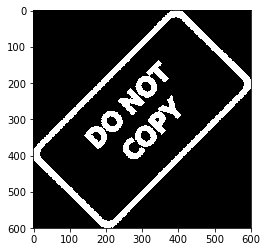

In [88]:
plt.imshow(bckgrnd)

In [89]:
# Now replace the above image with white
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

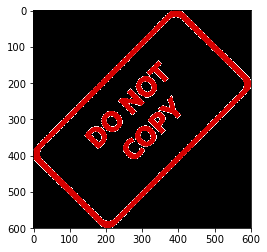

In [90]:
plt.imshow(fg)

In [91]:
# Final ROI
final_roi = cv2.bitwise_or(roi,fg)

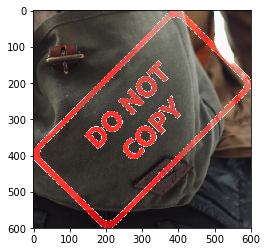

In [92]:
plt.imshow(final_roi)

In [93]:
large_img = img1
small_img = final_roi

In [94]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

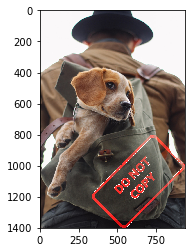

In [95]:
plt.imshow(large_img)